## Exercícios de Pesquisa Operacional

Exercícios criados projetados para testar competências essenciais, tais como:
* Otimização linear;
* Tomada de decisão em cenários reais; e
* Estratégias práticas de logística e gestão.

### Prepara o ambiente de execução

In [45]:
!pip install pulp | tail -1
!pip install pandas | tail -1
!pip install numpy | tail -1

import pulp
import pandas as pd
import numpy as np

### Exercício 3: Problema de Alocação

Uma empresa deve alocar 4 entregadores a 4 regiões diferentes. O tempo (em horas) para cada entregador completar as entregas em cada região está dado pela seguinte matriz:

| Entregador | Santos | Campinas | Sorocaba | São José dos Campos |
|:---:|:---:|:---:|:---:|:---:|
| 1 | 5 | 7 | 6 | 4 |
| 2 | 8 | 5 | 7 | 6 |
| 3 | 4 | 6 | 8 | 5 |
| 4 | 7 | 5 | 4 | 6 |

---
* Formule e resolva o problema utilizando um método apropriado, determinando a alocação ideal que minimiza o tempo total gasto.

O problema consiste em alocar de forma otimizada um recurso limitado (os entregadores)

In [46]:
dados = {
    "Entregador": [1, 2, 3, 4],
    "Santos": [5, 8, 4, 7],
    "Campinas": [7, 5, 6, 5],
    "Sorocaba": [6, 7, 8, 4],
    "São José dos Campos": [4, 6, 5, 6]
}

df = pd.DataFrame(dados)
df.head()

,Entregador,Santos,Campinas,Sorocaba,São José dos Campos
0,1,5,7,6,4
1,2,8,5,7,6
2,3,4,6,8,5
3,4,7,5,4,6


In [47]:
# separa os tempos em um dataFrame
tempo = df.iloc[:, 1:]

# Cria as variáveis de decisão Xij, onde X define se o Entregador "i" irá passar pela cidade "j"
x = pulp.LpVariable.dicts("x", ((i, j) for i in range(1, 5) for j in range(1, 5)), cat='Binary')

O nosso objetivo é minimizar o tempo gasto pelos entregadores, logo:

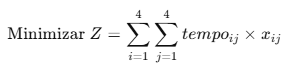

Onde tempo$_{ij}$ é o tempo necessário para o entregador *i* ir na região *j*

In [48]:
# Cria o Modelo de Otimização
model = pulp.LpProblem("Entregas", pulp.LpMinimize)

# Define a função objetivo -> soma dos tempos para cada entregador
model += pulp.lpSum(tempo.iloc[i-1, j-1] * x[(i, j)] for i in range(1, 5) for j in range(1, 5))

# Define as restrições ao modelo

# Restrição 1: cada entregador vai para uma cidade
for j in range(1, 5):
    model += pulp.lpSum(x[(i, j)] for i in range(1, 5)) == 1

# Restrição 2: Cada cidade recebe um entregador
for i in range(1, 5):
    model += pulp.lpSum(x[(i, j)] for j in range(1, 5)) == 1

# Resolve o modelo
model.solve()

1

In [53]:
# Resultados
# Entregador que irá para cada cidade
horas = 0
for i in range(1, 5):
    for j in range(1, 5):
        if x[(i, j)].varValue == 1:
            horas += tempo.iloc[i-1, j-1]
            print(f"Entregador {i} irá para {df.columns[j]}")

print(f"\nForam gastas {horas} horas acumuladas em entregas.")

Entregador 1 irá para São José dos Campos
Entregador 2 irá para Campinas
Entregador 3 irá para Santos
Entregador 4 irá para Sorocaba

Foram gastas 17 horas acumuladas em entregas.
